In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [10]:

excel_file = 'rehospitalization.xlsx'
sheet_name = 'hospitalization2'  
csv_sheet_name = 'hospitalization2.csv'  


# Check if the file exists in the current directory
if os.path.isfile(csv_sheet_name):
    print(f"'{sheet_name}' already exists in the directory as csv file.")
else:
    if os.path.isfile(excel_file):
        # Read the specific sheet into a DataFrame
        hospitalization2_excel = pd.read_excel(excel_file, sheet_name=sheet_name, engine='openpyxl')

        # Save the DataFrame to a CSV file
        csv_file = 'hospitalization2.csv'
        hospitalization2_excel.to_csv(csv_file, index=False, encoding='utf-8')

        print(f'Sheet "{sheet_name}" has been converted to {csv_file}')
    
    else: 
        print(f"'{excel_file}' does not exist in the current folder. Please upload it to the current directory")

'hospitalization2' already exists in the directory as csv file.


In [16]:
hospitalization2_df = pd.read_csv(csv_sheet_name)
erBeforeHospitalization_df = pd.read_csv("erhospitalization2_cleaned.csv")
# Check for nulls in the data
print(hospitalization2_df.isna().sum())

Patient                         0
unitName1                       0
Admission_Medical_Record        0
Admission_Entry_Date            0
Release_Date                    0
unitName2                       0
Admission_Medical_Record2       0
Admission_Entry_Date2           0
Release_Date2                   0
סוג קבלה                       68
מהיכן המטופל הגיע               0
Release_Type                    0
רופא משחרר                     88
ימי אשפוז                       0
אבחנות בקבלה                  802
אבחנות בשחרור                 233
מחלקות מייעצות               4176
ct                              0
dtype: int64


In [15]:
# I will drop the rows where there is null values in the "אבחנות בקבלה " column:
hospitalization2_df = hospitalization2_df.dropna(subset=['אבחנות בקבלה'])
print(hospitalization2_df.isna().sum())
print("\n\n",hospitalization2_df.shape)

Patient                         0
unitName1                       0
Admission_Medical_Record        0
Admission_Entry_Date            0
Release_Date                    0
unitName2                       0
Admission_Medical_Record2       0
Admission_Entry_Date2           0
Release_Date2                   0
סוג קבלה                       59
מהיכן המטופל הגיע               0
Release_Type                    0
רופא משחרר                     77
ימי אשפוז                       0
אבחנות בקבלה                    0
אבחנות בשחרור                  12
מחלקות מייעצות               3715
ct                              0
dtype: int64


 (8115, 18)


In [28]:
# Create a new df from the patient and diagnosis from the data before re-hospitalization2 and from the re-hospitalization2

# Select and rename columns from the first DataFrame
df1_selected = erBeforeHospitalization_df[['Patient', "אבחנות במיון"]].rename(columns={'Patient': 'patient_erbeforehospitalization2'})

# Select and rename columns from the second DataFrame
df2_selected = hospitalization2_df[['Patient', 'אבחנות בקבלה']].rename(columns={'Patient': 'patient_hospitalization2', 'אבחנות בקבלה': "אבחנות באשפוז חוזר"})

# Combine the selected columns into a new DataFrame
new_df = pd.concat([df1_selected, df2_selected], axis=1)

# Fill NaN values with 0 (or another placeholder value)
new_df['patient_erbeforehospitalization2'] = new_df['patient_erbeforehospitalization2'].fillna(0)

# Convert the column to int64
new_df['patient_erbeforehospitalization2'] = new_df['patient_erbeforehospitalization2'].astype('int64')

# Display the new DataFrame
print(new_df.dtypes)


patient_erbeforehospitalization2     int64
אבחנות במיון                        object
patient_hospitalization2             int64
אבחנות באשפוז חוזר                  object
dtype: object


In [46]:
new_df.head()

,patient_erbeforehospitalization2,אבחנות במיון,patient_hospitalization2,אבחנות באשפוז חוזר
0,1043772,7860,430047,"5370 , 7872 , 78720"
1,1043772,"2859 , 7860",447962,78060
2,1043772,"2859 , 7860",214558,5119
3,77493,2765,71277,"2859 , 7807"
4,77493,7860,112016,7865


In [57]:

# Initialize counters
match_count = 0
mismatch_count = 0

# Define the delimiter used to separate multiple values in the cell (e.g., comma, semicolon)
delimiter = ','

# Iterate over unique values in 'patient_erbeforehospitalization2'
for patient_id in new_df['patient_erbeforehospitalization2'].values:
    # Check if the patient ID exists in 'patient_hospitalization2'
    if patient_id in new_df['patient_hospitalization2'].values:
        # Get the values for the corresponding diagnoses
        diagnosis_er = new_df.loc[new_df['patient_erbeforehospitalization2'] == patient_id, 'אבחנות במיון'].values[0]
        diagnosis_hospitalization = new_df.loc[new_df['patient_hospitalization2'] == patient_id,  "אבחנות באשפוז חוזר"].values[0]
        
        # Handle NaN values by treating them as empty sets
        if isinstance(diagnosis_er, str):
            diagnosis_er_set = set(diagnosis_er.split(delimiter))
        else:
            diagnosis_er_set = set()

        if isinstance(diagnosis_hospitalization, str):
            diagnosis_hospitalization_set = set(diagnosis_hospitalization.split(delimiter))
        else:
            diagnosis_hospitalization_set = set()
        
        # Compare the sets
        # if diagnosis_er_set == diagnosis_hospitalization_set:
        for diagnosis in diagnosis_er_set:
            for diagnosis2 in diagnosis_hospitalization_set:
                if diagnosis == diagnosis2:
                    match_count += 1
        else:
            mismatch_count += 1

# Output the results
print(f'Matches: {match_count}')
print(f'Mismatches: {mismatch_count}')

sum_of_match_not_match = match_count + mismatch_count
percent_of_match = (match_count / sum_of_match_not_match) * 100
print("Matches percent:", round(percent_of_match,1) , "%")

Matches: 1311
Mismatches: 7415
Matches percent: 15.0 %


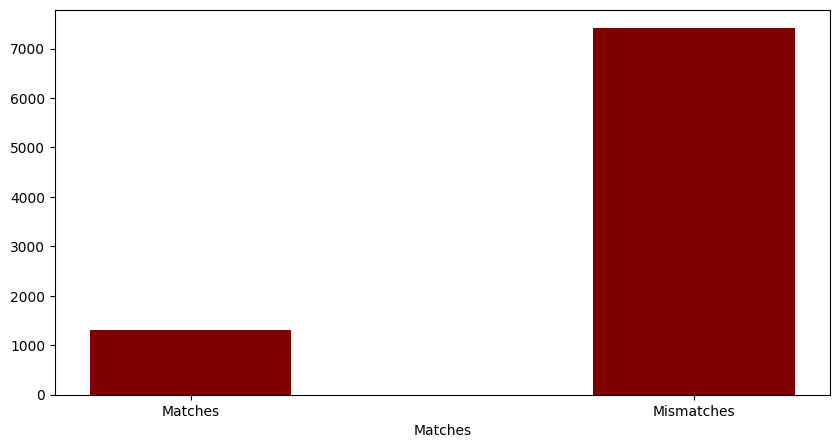

In [58]:
match_or_not = {"Matches": match_count, "Mismatches": mismatch_count}
match_or_not_keys = list(match_or_not.keys())
values = list(match_or_not.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(match_or_not_keys, values, color ='maroon', 
        width = 0.4)

plt.xlabel("Matches")

plt.show()

It is possible to see that the majority of the patients that were re-hospitalized did not have the same diagnosis in the re-hospitalization. Nevertheless, non-negligible percent of 15% have matches in the re-hospitalization. 